In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# MNIST 10 Value
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
# Network Parameters
input_dim = 784   #(img shape: 28*28)
hid1_dim = 256
hid2_dim = 256
hid3_dim = 100
output_dim = 10

# tf Graph input
x = tf.placeholder("float", [None, input_dim])
y = tf.placeholder("float", [None, output_dim])

In [6]:
# Store layers weight & bias in Dictionary
weights = {
    'h1': tf.Variable(tf.random_normal([input_dim, hid1_dim])),
    'h2': tf.Variable(tf.random_normal([hid1_dim, hid2_dim])),
    'h3': tf.Variable(tf.random_normal([hid2_dim, hid3_dim])),
    'out': tf.Variable(tf.random_normal([hid3_dim, output_dim]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hid1_dim])),
    'b2': tf.Variable(tf.random_normal([hid2_dim])),
    'b3': tf.Variable(tf.random_normal([hid3_dim])),
    'out': tf.Variable(tf.random_normal([output_dim]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Model
layer1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
layer3 = tf.add(tf.matmul(layer2, weights['h3']), biases['b3'])
res = tf.add(tf.matmul(layer3, weights['out']), biases['out'])

print(res)

Tensor("Add_3:0", shape=(?, 10), dtype=float32)


In [19]:
# Hyper Parameters
lr = 0.05
epoch = 5000
batch = 128
display = 10

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=res, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss_op)

# Evaluate Model  (cy = correct y)
cy = tf.equal(tf.math.argmax(res,1), tf.math.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(cy, tf.float32))

# Initialize the Variables
init = tf.global_variables_initializer()

In [20]:
taccuracy = []
tloss = []
tidx = []

# Start Training
with tf.Session() as sess:
    # Run initializer
    sess.run(init)
        
    for ep in range(epoch):
        batchx , batchy = mnist.train.next_batch(batch)
        
        # Run Optimization (BackProp)
        sess.run(train_op, feed_dict={x: batchx, y: batchy})
        
        if((ep % display) == 0):
            # Calculate Batch Loss and Accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={x:batchx, y: batchy})
            
            tidx.append(ep)
            tloss.append(loss)
            taccuracy.append(acc)
            
            print('Epoch: %d, Loss: %f, Accuracy: %f' % (ep, loss, acc))
    
    tacc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print('Testing Accuracy: ', tacc)

Epoch: 0, Loss: 19857.369141, Accuracy: 0.343750
Epoch: 50, Loss: 1931.929199, Accuracy: 0.906250
Epoch: 100, Loss: 1227.415161, Accuracy: 0.882812
Epoch: 150, Loss: 1436.824219, Accuracy: 0.851562
Epoch: 200, Loss: 596.379456, Accuracy: 0.914062
Epoch: 250, Loss: 1315.811035, Accuracy: 0.835938
Epoch: 300, Loss: 771.650513, Accuracy: 0.882812
Epoch: 350, Loss: 723.538940, Accuracy: 0.898438
Epoch: 400, Loss: 223.737839, Accuracy: 0.960938
Epoch: 450, Loss: 309.574890, Accuracy: 0.890625
Epoch: 500, Loss: 462.664185, Accuracy: 0.867188
Epoch: 550, Loss: 490.632019, Accuracy: 0.875000
Epoch: 600, Loss: 467.812317, Accuracy: 0.867188
Epoch: 650, Loss: 307.158661, Accuracy: 0.882812
Epoch: 700, Loss: 308.122192, Accuracy: 0.875000
Epoch: 750, Loss: 178.030762, Accuracy: 0.921875
Epoch: 800, Loss: 537.216309, Accuracy: 0.828125
Epoch: 850, Loss: 82.057388, Accuracy: 0.937500
Epoch: 900, Loss: 196.225021, Accuracy: 0.914062
Epoch: 950, Loss: 370.718079, Accuracy: 0.851562
Epoch: 1000, Loss:

Epoch: 8350, Loss: 3.722121, Accuracy: 0.921875
Epoch: 8400, Loss: 4.951987, Accuracy: 0.914062
Epoch: 8450, Loss: 12.166371, Accuracy: 0.875000
Epoch: 8500, Loss: 12.761397, Accuracy: 0.851562
Epoch: 8550, Loss: 9.062080, Accuracy: 0.859375
Epoch: 8600, Loss: 7.616680, Accuracy: 0.898438
Epoch: 8650, Loss: 11.057876, Accuracy: 0.835938
Epoch: 8700, Loss: 9.385523, Accuracy: 0.882812
Epoch: 8750, Loss: 1.579860, Accuracy: 0.960938
Epoch: 8800, Loss: 15.038853, Accuracy: 0.820312
Epoch: 8850, Loss: 11.864340, Accuracy: 0.906250
Epoch: 8900, Loss: 7.693682, Accuracy: 0.914062
Epoch: 8950, Loss: 10.250262, Accuracy: 0.906250
Epoch: 9000, Loss: 3.727476, Accuracy: 0.929688
Epoch: 9050, Loss: 12.527892, Accuracy: 0.890625
Epoch: 9100, Loss: 12.223379, Accuracy: 0.867188
Epoch: 9150, Loss: 6.892846, Accuracy: 0.898438
Epoch: 9200, Loss: 6.918231, Accuracy: 0.929688
Epoch: 9250, Loss: 15.950969, Accuracy: 0.820312
Epoch: 9300, Loss: 11.752748, Accuracy: 0.890625
Epoch: 9350, Loss: 4.050544, A

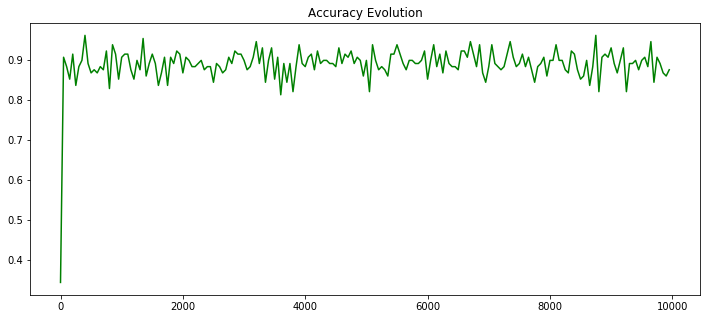

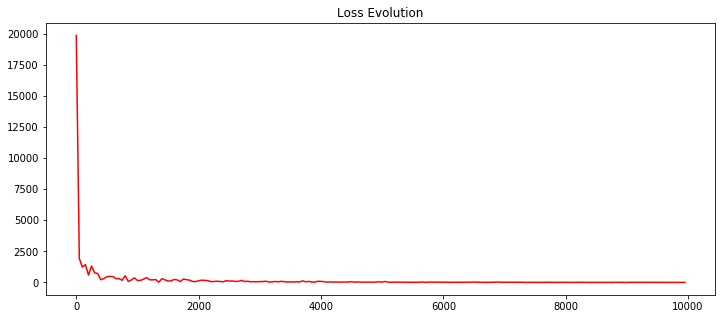

In [21]:
# Plot accuracy and loss

fig = plt.figure(figsize=(12,5))
plt.title('Accuracy Evolution')
plt.plot(tidx, taccuracy, color='green')
plt.show()

fig = plt.figure(figsize=(12,5))
plt.title('Loss Evolution')
plt.plot(tidx, tloss, color='red')
plt.show()